In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)


In [2]:
# Read the dataset
movies = pd.read_csv("movie_data_for_assignment.csv")

In [3]:
movies.dtypes 

movie_title                   object
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
movie_facebook_likes           int64
i

In [4]:
movies.head()

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,Stuart Little,Color,Rob Minkoff,101.0,84.0,50.0,692.0,Nathan Lane,979.0,140015224.0,...,179.0,English,Germany,PG,133000000.0,1999.0,886.0,1.85,0,5.9
1,Crash,Color,Paul Haggis,287.0,115.0,549.0,911.0,Loretta Devine,3000.0,54557348.0,...,1624.0,English,Germany,R,6500000.0,2004.0,912.0,2.35,18000,7.9
2,Ghost Rider: Spirit of Vengeance,Color,Mark Neveldine,287.0,96.0,83.0,1000.0,Spencer Wilding,12000.0,51774002.0,...,331.0,English,USA,PG-13,57000000.0,2011.0,1000.0,2.35,18000,4.3
3,Gettysburg,Color,Ron Maxwell,22.0,271.0,33.0,251.0,William Morgan Sheppard,854.0,10769960.0,...,256.0,English,USA,PG,25000000.0,1993.0,702.0,1.85,0,7.7
4,Planet of the Apes,Color,Tim Burton,230.0,119.0,13000.0,567.0,Estella Warren,1000.0,180011740.0,...,1368.0,English,USA,PG-13,100000000.0,2001.0,658.0,2.35,0,5.7


In [5]:
# Obtain all the columns which have missing values and the number of missing values
null_counts = movies.apply(lambda x: sum(x.isnull())) 
print(null_counts[null_counts!=0])


color                       17
director_name               95
num_critic_for_reviews      46
duration                    15
director_facebook_likes     95
actor_3_facebook_likes      20
actor_2_name                12
actor_1_facebook_likes       6
gross                      758
actor_1_name                 6
actor_3_name                20
facenumber_in_poster         9
plot_keywords              133
num_user_for_reviews        18
language                    10
country                      4
content_rating             254
budget                     431
title_year                  99
actor_2_facebook_likes      12
aspect_ratio               279
dtype: int64


In [6]:
movies[movies['actor_1_name'].isnull()]
movies[movies['actor_2_name'].isnull()]
movies[movies['director_name'].isnull()]

# There is no way to obtain names of actors and director from other values hence it is better to drop the correcponding rows.

movies.dropna(subset =['actor_2_name','director_name','actor_3_name'],inplace =True)

In [7]:
# Now check again how many attributes have NaN values
null_counts = movies.apply(lambda x: sum(x.isnull())) 
print(null_counts[null_counts!=0])

color                      13
num_critic_for_reviews     37
duration                   11
gross                     659
facenumber_in_poster        9
plot_keywords             118
num_user_for_reviews       12
language                    7
content_rating            210
budget                    339
title_year                  2
aspect_ratio              255
dtype: int64


In [8]:
movies.shape
# We lost about 100 rows which accounts to about 2% loss in data. 

(4188, 28)

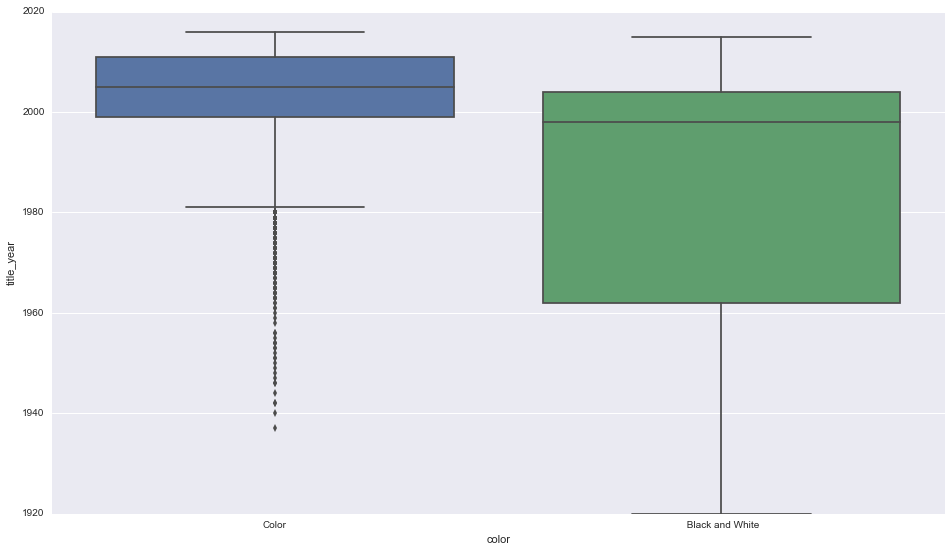

In [9]:
sns.boxplot(x = movies['color'], y = movies['title_year'])
# There is a clear correlation between year and color. So we can fill in values for color by setting a threshold for year. 

In [10]:
movies[movies['color'].isnull()]

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
646,The Ridges,NaN,Brandon Landers,NaN,143.0,8.0,8.0,Alana Kaniewski,720.0,NaN,...,8.0,English,USA,NaN,17350.0,2011.0,19.0,NaN,33,3.0
882,Dear John,NaN,Lasse Hallström,162.0,108.0,529.0,690.0,Henry Thomas,17000.0,80014842.0,...,186.0,English,USA,PG-13,25000000.0,2010.0,861.0,2.35,14000,6.3
1213,Snow Flower and the Secret Fan,NaN,Wayne Wang,56.0,104.0,61.0,451.0,Russell Wong,974.0,1346503.0,...,22.0,English,China,PG-13,6000000.0,2011.0,595.0,2.35,0,6.1
1946,Alpha and Omega 4: The Legend of the Saw Tooth...,NaN,Richard Rich,2.0,45.0,24.0,29.0,Kate Higgins,122.0,NaN,...,6.0,NaN,USA,NaN,7000000.0,2014.0,35.0,NaN,41,6.0
2512,The Rise of the Krays,NaN,Zackary Adler,10.0,110.0,0.0,109.0,Kevin Leslie,490.0,NaN,...,26.0,English,UK,R,2500000.0,2015.0,159.0,NaN,0,5.0
2906,A Fine Step,NaN,Jonathan Meyers,1.0,111.0,0.0,426.0,Luke Perry,657.0,NaN,...,1.0,NaN,USA,PG,1000000.0,2014.0,608.0,NaN,212,5.3
3013,Something Wicked,NaN,Darin Scott,7.0,95.0,39.0,375.0,Shantel VanSanten,1000.0,NaN,...,15.0,English,USA,R,3000000.0,2014.0,747.0,NaN,395,4.8
3016,Into the Grizzly Maze,NaN,David Hackl,48.0,94.0,43.0,129.0,Michaela McManus,826.0,NaN,...,38.0,English,USA,R,10000000.0,2015.0,476.0,1.85,0,5.3
3105,Midnight Cabaret,NaN,Pece Dingo,1.0,94.0,0.0,87.0,Wilhelm von Homburg,156.0,NaN,...,4.0,English,USA,R,NaN,1990.0,102.0,NaN,4,4.5
3144,Red Sky,NaN,Mario Van Peebles,7.0,100.0,535.0,399.0,Mario Van Peebles,668.0,NaN,...,11.0,English,USA,PG-13,25000000.0,2014.0,535.0,NaN,437,4.1


In [11]:
# All these movies were released after 1990  so they are most probably colour
movies['color'].fillna('Color', inplace =True)

In [12]:
null_counts = movies.apply(lambda x: sum(x.isnull())) 
print(null_counts[null_counts!=0])

num_critic_for_reviews     37
duration                   11
gross                     659
facenumber_in_poster        9
plot_keywords             118
num_user_for_reviews       12
language                    7
content_rating            210
budget                    339
title_year                  2
aspect_ratio              255
dtype: int64


In [13]:
# Fill missing values with median/mean/mode values for some of the attributes whih either can not be determined in other ways
movies['aspect_ratio'].fillna(2.35, inplace = True) #mode
movies['title_year'].fillna(movies['title_year'].median(), inplace = True)
movies['facenumber_in_poster'].fillna(movies['facenumber_in_poster'].median(), inplace = True)
movies['language'].fillna('English', inplace = True) #mode
movies['num_user_for_reviews'].fillna(movies['num_user_for_reviews'].median(), inplace = True)
movies['duration'].fillna(movies['duration'].median(), inplace = True)

In [14]:
null_counts = movies.apply(lambda x: sum(x.isnull())) 
print(null_counts[null_counts!=0])

num_critic_for_reviews     37
gross                     659
plot_keywords             118
content_rating            210
budget                    339
dtype: int64


In [15]:
movies['num_critic_for_reviews'].fillna(0,inplace = True)
movies['plot_keywords'].fillna('None',inplace = True)

In [16]:
movies['content_rating'].value_counts()
movies['content_rating'].fillna('Not Rated', inplace = True)

In [17]:
null_counts = movies.apply(lambda x: sum(x.isnull())) 
print(null_counts[null_counts!=0])

gross     659
budget    339
dtype: int64


In [18]:
# gross and budget are attributes that could have a pretty high correlation with the imdb score.
movies.shape

(4188, 28)

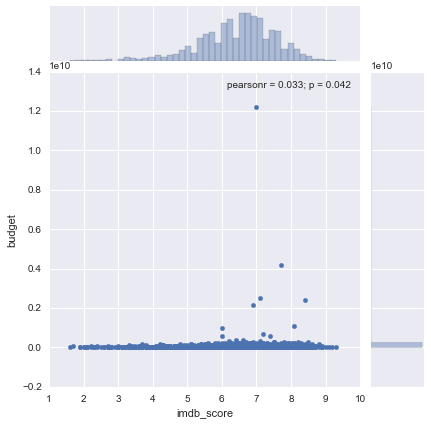

In [19]:
sns.jointplot(x='imdb_score', y='budget', data=movies);

In [20]:
# There is a very evident outlier here. 
movies.reset_index
maxbud = movies['budget'].max()
movies.budget[movies.budget == maxbud].index

Int64Index([3129], dtype='int64')

In [21]:
movies.loc[3129,:].movie_title

'The Host\xa0'

In [22]:
# On examining the movie, the budget given is not given in dollars! 
# The data for budget seems to be highly prone to inconsistencies. Also, the pearson correlaion value for this is very low (0.031) so it is probably best to drop this column
movies.drop(['budget'],axis=1, inplace =True)

In [23]:
movies.dtypes

movie_title                   object
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
movie_facebook_likes           int64
imdb_score                   float64
d

In [24]:
scores = movies.pop('imdb_score')

In [25]:
# Identification of skewed distributions in columns
from scipy.stats import skew
numerical_variables = movies.dtypes[movies.dtypes != 'object'].index

skewed = movies[numerical_variables].apply(lambda x: skew(x.dropna().astype(float)))
# Using skew threshold of 0.75
skewed = skewed[skewed>0.75]
skewed = skewed.index

In [26]:
skewed

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [27]:
# Treating skewed columns with log(1+ val)
movies[skewed] = np.log1p(movies[skewed])

In [28]:
movies['imdb_score'] = scores

In [29]:
movies.dtypes

movie_title                   object
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users              float64
cast_total_facebook_likes    float64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
movie_facebook_likes         float64
imdb_score                   float64
d

In [30]:
# Getting dummies for categorical columns
color_dummies= pd.get_dummies(movies.color)
movies = pd.concat([movies, color_dummies], axis =1 )

genre_dummies= pd.get_dummies(movies.genres)
movies = pd.concat([movies, genre_dummies], axis =1 )

language_dummies= pd.get_dummies(movies.language)
movies = pd.concat([movies, language_dummies], axis =1 )


In [31]:
country_dummies= pd.get_dummies(movies.country)
movies = pd.concat([movies, country_dummies], axis =1 )

content_dummies= pd.get_dummies(movies.content_rating)
movies = pd.concat([movies, content_dummies], axis =1 )

movies['movie_imdb_link'].head()

0    http://www.imdb.com/title/tt0164912/?ref_=fn_t...
1    http://www.imdb.com/title/tt0375679/?ref_=fn_t...
2    http://www.imdb.com/title/tt1071875/?ref_=fn_t...
3    http://www.imdb.com/title/tt0107007/?ref_=fn_t...
4    http://www.imdb.com/title/tt0133152/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

In [32]:
movies.index = range(len(movies.movie_title))

In [33]:
# Imputing values for gross by using a linear model 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
prediction_movies = movies.loc[:, movies.dtypes != object]

In [34]:
# Splitting dataset into 2 parts. One which has values for gross and one missing values for gross
withoutgross = prediction_movies[prediction_movies['gross'].isnull()]
withgross = prediction_movies.drop(prediction_movies.index[withoutgross.index], axis =0)

In [35]:
y_train = withgross['gross']
withgross.pop('gross')
X_train = withgross

In [36]:
withoutgross.pop('gross')
X_test = withoutgross

In [37]:
y_train = y_train.reshape((3529,1))

In [38]:
# Fit basic linear model. Hyperparameters need not be tuned
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Obtain values for gross
y_test = linreg.predict(X_test)

In [40]:
withoutgross['gross'] = y_test

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
withgross['gross'] = y_train

In [42]:
withoutgross.shape

(659, 936)

In [43]:
withgross.shape

(3529, 936)

In [44]:
# Combine the dataframes
frames = [withgross, withoutgross]
movies = pd.concat(frames)

In [ ]:
# Save final dataset to file as new csv
movies.to_csv('movies_final_dataset.csv')

In [ ]:
#maybe extract top 20 words and create dummies 